In [1]:
import pandas as pd
import servicex as sx
import awkward as ak
from func_adl_servicex import ServiceXSourceUpROOT
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 200 # make figures bigger and more readable

In [2]:
dataset_name = "cms:DYJetsToLL_M-50_TuneCP5_13TeV-amcatnloFXFX-pythia8/RunIIAutumn18NanoAODv7-Nano02Apr2020_102X_upgrade2018_realistic_v21_ext2-v1/NANOAODSIM"
sx_dataset = sx.ServiceXDataset(dataset_name, "uproot")
ds = ServiceXSourceUpROOT(sx_dataset, "Events")
best_trijet_pt_6 = ds.Where(lambda event: event.nJet >= 3)\
                     .Select(lambda event: {'pt': event.Jet_pt,
                                            'eta': event.Jet_eta,
                                            'phi': event.Jet_phi,
                                            'mass': event.Jet_mass}.Zip().ToFourMomenta()
                                           .Choose(3)
                                           .Select(lambda triplet: triplet[0] + triplet[1] + triplet[2])
                                           .OrderBy(lambda trijet: abs(trijet.m - 172.5))
                                           .First()
                                           .Select(lambda best_trijet: best_trijet.pt)).AsAwkwardArray().value()

cms:DYJetsToLL_M-50_...:   0%|          | 0/9000000000.0 [00:00]

        cms:DYJetsToLL_M-50_... Downloaded:   0%|          | 0/9000000000.0 [00:00]

In [3]:
best_trijet_pt_6

<Array [135, 14.9, 29.7, ... 55.1, 35.4, 74] type='165702649 * float32'>

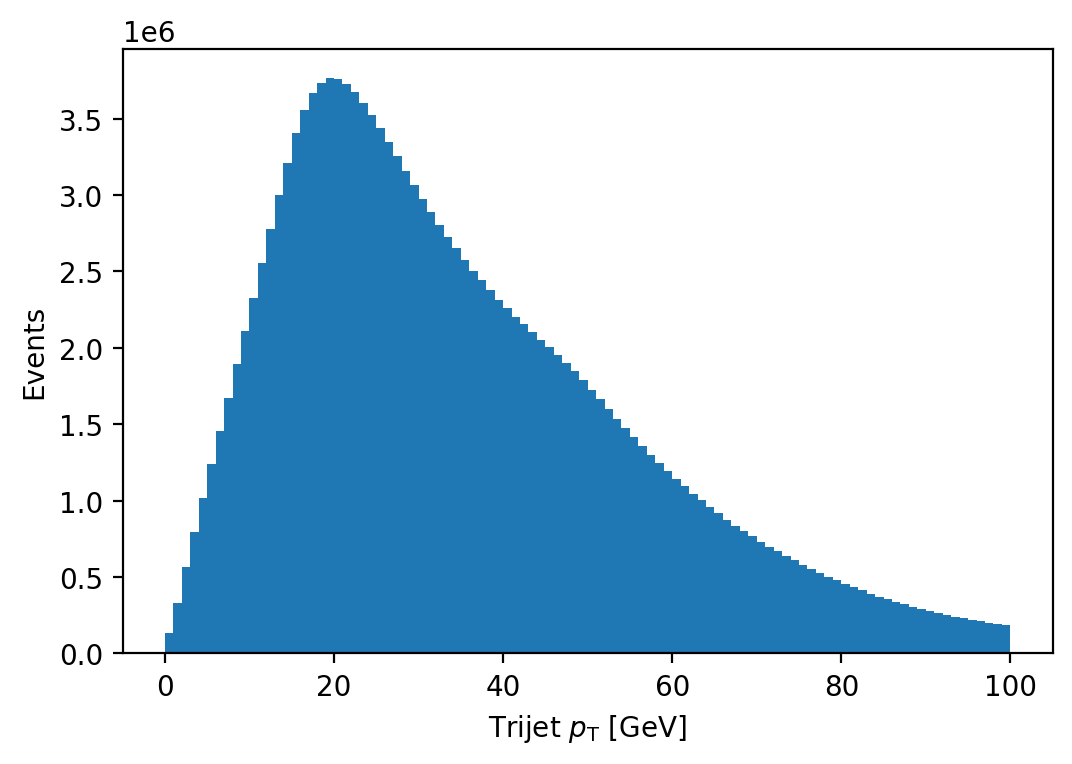

In [4]:
plt.hist(best_trijet_pt_6, bins=100, range=(0, 100))
plt.xlabel(r'Trijet $p_\mathrm{T}$ [GeV]')
plt.ylabel('Events')
plt.show()